In [1]:
import scanpy as sc
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scib_metrics
from scib_metrics.benchmark import Benchmarker

In [3]:
methods = ['bcd_umap', 'pca_umap', 'limma_umap', 'seurat_umap', 'seurat_rpca_umap', 'harmony_umap']
sample = 'sim_eq'

metadata = pd.read_csv("../output-embeddings/sim_eq_metadata.csv", index_col=0)

In [4]:
embs = {}
for m in methods:
    embs[m] = pd.read_csv(f"../output-embeddings/{sample}_{m}.csv", index_col=0)

In [5]:
adata = sc.AnnData(np.zeros([len(metadata), 0]), obs=metadata)
adata

AnnData object with n_obs × n_vars = 7000 × 0
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'label'

In [6]:
for m in methods:
    matrix_name = m
    adata.obsm[matrix_name] = embs[m].to_numpy()

In [7]:
adata.obs['label'].unique()

array(['S', 'S->A', 'S->B', 'A', 'B', 'A->A1', 'A->A2', 'B->B1', 'B->B2',
       'A1', 'A2', 'B1', 'B2'], dtype=object)

In [8]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,label
cell1,simulation,215823,200,day1,S
cell2,simulation,211911,200,day1,S
cell3,simulation,203028,200,day1,S
cell4,simulation,215422,200,day1,S
cell5,simulation,210068,200,day1,S
...,...,...,...,...,...
cell6996,simulation,292258,200,day4_sample2,B2
cell6997,simulation,288881,200,day4_sample2,B2
cell6998,simulation,291617,200,day4_sample2,B2
cell6999,simulation,291761,200,day4_sample2,B2


C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


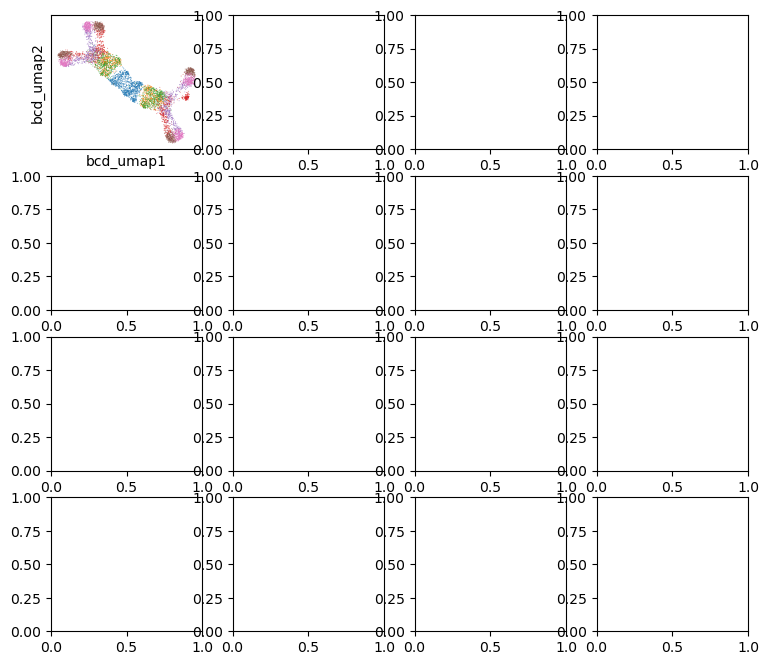

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatte

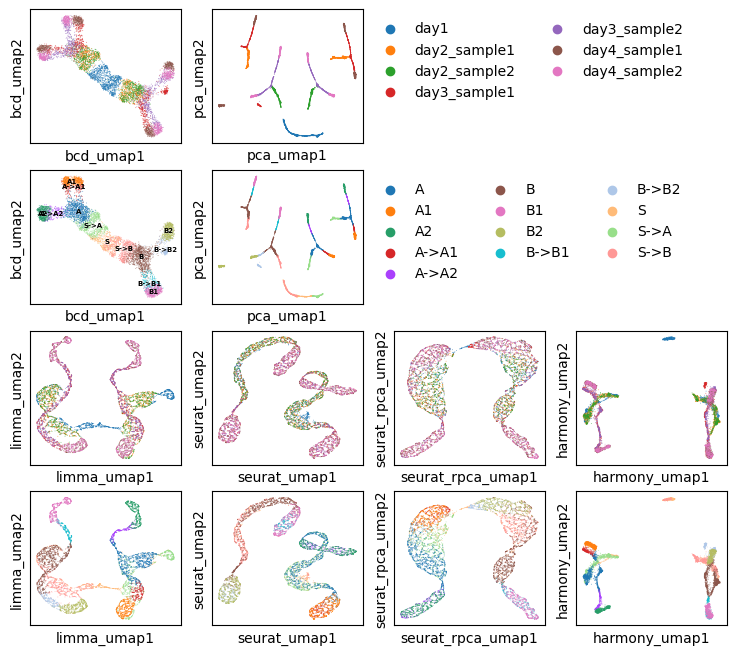

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(9, 8))
for i, m in enumerate(methods):
    legend_loc0 = None
    legend_loc1 = None
    if i == 0:
        legend_loc1 = 'on data'
        legend_fontsize = 5
    if i == 1:
        legend_loc0 = 'right margin'
        legend_loc1 = 'right margin'
        legend_fontsize = 10
    j = i
    k = 0
    if j >= 2:
        k = 1
        j = j - 2
    sc.pl.embedding(adata, m, color='sample', ax=axes[k * 2][j], legend_loc=legend_loc0, title='', legend_fontsize=legend_fontsize, 
                    alpha=0.75, size=1.5)
    sc.pl.embedding(adata, m, color='label', ax=axes[k * 2 + 1][j], legend_loc=legend_loc1, title='', legend_fontsize=legend_fontsize, 
                    alpha=0.75, size=1.5)
    if i == 1:
        axes[(i // 4) * 2][i % 4].legend(ncol=2, bbox_to_anchor=(1., 1.), frameon=False, fontsize=10)
        axes[(i // 4) * 2 + 1][i % 4].legend(ncol=3, bbox_to_anchor=(1., 1.), frameon=False, fontsize=10)
        
for i in range(2, 4):
    axes[(i // 4) * 2][i % 4].set_axis_off()
    axes[(i // 4) * 2 + 1][i % 4].set_axis_off()
plt.tight_layout(pad=1.5)
fig

In [10]:
fig.savefig("../figures/sim.png", dpi=300, bbox_inches='tight')